In [2]:
import sys
sys.path.insert(0,'..')

%load_ext autoreload
%autoreload 2

In [3]:
import football_modelling.metrica.io as mio
import football_modelling.metrica.viz as mviz
import football_modelling.metrica.velocities as mvel
from football_modelling.data import load_metrica_dir
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


/Users/thomas/.pyenv/versions/3.10.0/envs/soccer/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
# set up initial path to data
DATADIR = load_metrica_dir()
game_id = 2  # let's look at sample match 2


In [5]:
# read in the event data
events = mio.read_event_data(DATADIR, game_id)


In [6]:
tracking_home = mio.tracking_data(DATADIR, game_id, "Home")
tracking_away = mio.tracking_data(DATADIR, game_id, "Away")


Reading team: home
Reading team: away


In [7]:
# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)


In [8]:
tracking_home


,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,...,NaN,NaN,-9.71278,24.17468,1.09392,-30.29672,-23.36028,9.04400,NaN,NaN
141153,2,5646.12,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,...,NaN,NaN,-9.71278,24.17468,1.09286,-30.34568,-23.31046,9.03176,NaN,NaN
141154,2,5646.16,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,...,NaN,NaN,-9.71278,24.17468,1.09074,-30.40348,-23.28714,9.02632,NaN,NaN


In [9]:
tracking_away


,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,43.68366,1.14852,-1.03032,37.40000,-1.15434,3.54416,10.37528,-5.07824,...,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.33604,5.73104,NaN,NaN
141153,2,5646.12,43.66246,1.14852,-1.03032,37.40000,-1.17236,3.56252,10.35302,-5.10612,...,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.31802,5.74600,NaN,NaN
141154,2,5646.16,43.63808,1.14852,-1.03032,37.40000,-1.17872,3.61488,10.34878,-5.13400,...,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.30318,5.79020,NaN,NaN


In [10]:
events


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,4.24,-18.36,-22.26,17.68
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,-20.14,13.60,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,-19.08,13.60,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,-16.96,12.24,NaN,NaN


In [11]:
# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home, tracking_away, events = mio.to_single_playing_direction(
    tracking_home, tracking_away, events
)


In [12]:
# Making a movie of the second home team goal
PLOTDIR = "../Output"
mviz.save_match_clip(
    tracking_home.iloc[73600 : 73600 + 500],
    tracking_away.iloc[73600 : 73600 + 500],
    PLOTDIR,
    fname="home_goal_2",
    include_player_velocities=False,
)


Generating movie...done


In [13]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(
    tracking_home, smoothing=True, filter_="moving_average"
)
tracking_away = mvel.calc_player_velocities(
    tracking_away, smoothing=True, filter_="moving_average"
)


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

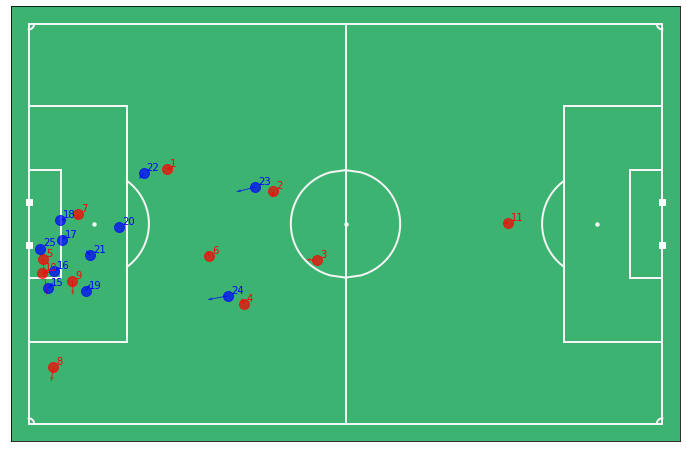

In [14]:
# plot a random frame, plotting the player velocities using quivers
mviz.plot_frame(
    tracking_home.loc[10000],
    tracking_away.loc[10000],
    include_player_velocities=True,
    annotate=True,
)


In [15]:
# Create a Physical summary dataframe for home players
home_players = np.unique(
    [c.split("_")[1] for c in tracking_home.columns if c[:4] == "Home"]
)
home_summary = pd.DataFrame(index=home_players)


In [16]:
# Calculate minutes played for each player
minutes = []
for player in home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = "Home_" + player + "_x"  # use player x-position coordinate
    player_minutes = (
        (
            tracking_home[column].last_valid_index()
            - tracking_home[column].first_valid_index()
            + 1
        )
        / 25
        / 60.0
    )  # convert to minutes
    minutes.append(player_minutes)
home_summary["Minutes Played"] = minutes
home_summary = home_summary.sort_values(["Minutes Played"], ascending=False)


In [17]:
# Calculate total distance covered for each player
distance = []
for player in home_summary.index:
    column = "Home_" + player + "_speed"
    player_distance = (
        tracking_home[column].sum() / 25.0 / 1000
    )  # this is the sum of the distance travelled from one observation to the next (1/25 = 40ms) in km.
    distance.append(player_distance)
home_summary["Distance [km]"] = distance


Text(0, 0.5, 'Distance covered [km]')

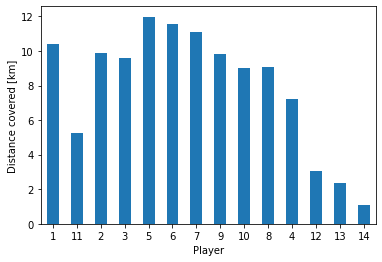

In [18]:
# make a simple bar chart of distance covered for each player
plt.subplots()
ax = home_summary["Distance [km]"].plot.bar(rot=0)
ax.set_xlabel("Player")
ax.set_ylabel("Distance covered [km]")


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

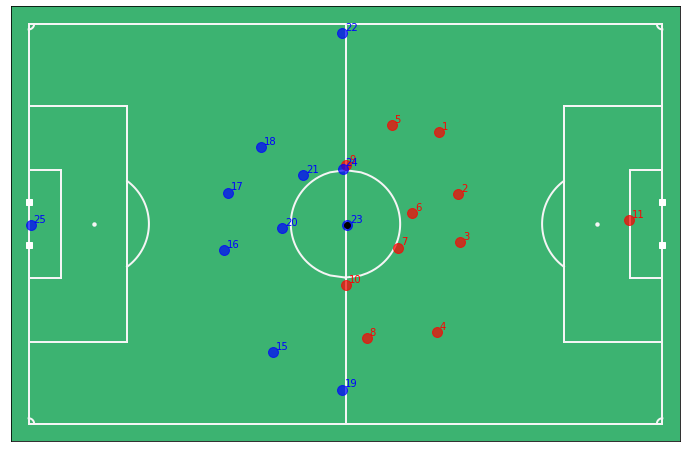

In [19]:
# plot positions at KO (to find out what position each player is playing)
mviz.plot_frame(
    tracking_home.loc[51],
    tracking_away.loc[51],
    include_player_velocities=False,
    annotate=True,
)


In [20]:
# now calculate distance covered while: walking, joggings, running, sprinting
walking = []
jogging = []
running = []
sprinting = []
for player in home_summary.index:
    column = "Home_" + player + "_speed"
    # walking (less than 2 m/s)
    player_distance = (
        tracking_home.loc[tracking_home[column] < 2, column].sum() / 25.0 / 1000
    )
    walking.append(player_distance)
    # jogging (between 2 and 4 m/s)
    player_distance = (
        tracking_home.loc[
            (tracking_home[column] >= 2) & (tracking_home[column] < 4), column
        ].sum()
        / 25.0
        / 1000
    )
    jogging.append(player_distance)
    # running (between 4 and 7 m/s)
    player_distance = (
        tracking_home.loc[
            (tracking_home[column] >= 4) & (tracking_home[column] < 7), column
        ].sum()
        / 25.0
        / 1000
    )
    running.append(player_distance)
    # sprinting (greater than 7 m/s)
    player_distance = (
        tracking_home.loc[tracking_home[column] >= 7, column].sum() / 25.0 / 1000
    )
    sprinting.append(player_distance)

home_summary["Walking [km]"] = walking
home_summary["Jogging [km]"] = jogging
home_summary["Running [km]"] = running
home_summary["Sprinting [km]"] = sprinting


Text(0, 0.5, 'Distance covered [m]')

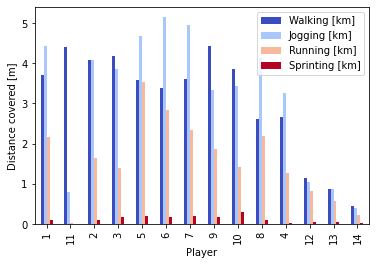

In [21]:
# make a clustered bar chart of distance covered for each player at each speed
ax = home_summary[
    ["Walking [km]", "Jogging [km]", "Running [km]", "Sprinting [km]"]
].plot.bar(colormap="coolwarm")
ax.set_xlabel("Player")
ax.set_ylabel("Distance covered [m]")


In [22]:
# sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second
nsprints = []
sprint_threshold = 7  # minimum speed to be defined as a sprint (m/s)
sprint_window = (
    1 * 25
)  # minimum duration sprint should be sustained (in this case, 1 second = 25 consecutive frames)
for player in home_summary.index:
    column = "Home_" + player + "_speed"
    # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
    # diff helps us to identify when the window starts
    player_sprints = np.diff(
        1
        * (
            np.convolve(
                1 * (tracking_home[column] >= sprint_threshold),
                np.ones(sprint_window),
                mode="same",
            )
            >= sprint_window
        )
    )
    nsprints.append(np.sum(player_sprints == 1))
home_summary["# sprints"] = nsprints


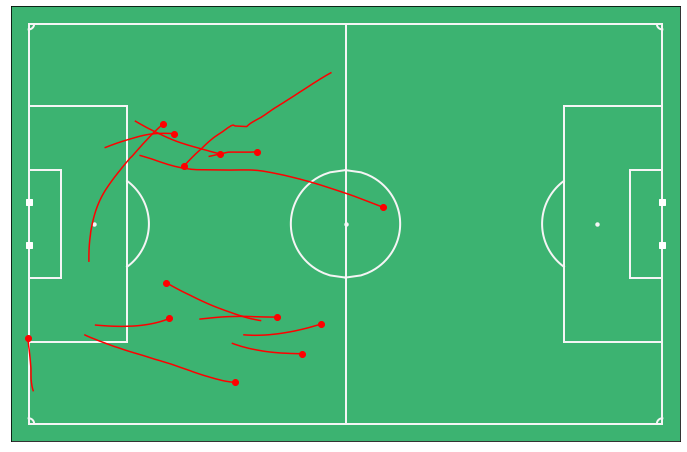

In [25]:
# Plot the trajectories for each of player 10's sprints
player = "10"
column = "Home_" + player + "_speed"  # spped
column_x = "Home_" + player + "_x"  # x position
column_y = "Home_" + player + "_y"  # y position
# same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed was above the sprint_threshold
player_sprints = np.diff(
    1
    * (
        np.convolve(
            1 * (tracking_home[column] >= sprint_threshold),
            np.ones(sprint_window),
            mode="same",
        )
        >= sprint_window
    )
)
player_sprints_start = (
    np.where(player_sprints == 1)[0] - int(sprint_window / 2) + 1
)  # adding sprint_window/2 because of the way that the convolution is centred
player_sprints_end = np.where(player_sprints == -1)[0] + int(sprint_window / 2) + 1
fig, ax = mviz.plot_pitch()
for s, e in zip(player_sprints_start, player_sprints_end):
    ax.plot(tracking_home[column_x].iloc[s], tracking_home[column_y].iloc[s], "ro")
    ax.plot(
        tracking_home[column_x].iloc[s : e + 1],
        tracking_home[column_y].iloc[s : e + 1],
        "r",
    )

# END
